# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dzaki Asari Surya Putra
- **Email:** dzakiasari86@gmail.com
- **ID Dicoding:** dzakiasari

## Menentukan Pertanyaan Bisnis

- Bagaimana tren total penyewaan sepeda berdasarkan musim selama dua tahun terakhir? Apakah terjadi peningkatan atau penurunan dari tahun sebelumnya?
- Bagaimana distribusi pengguna sepeda registered dan pengguna sewa casual setiap musimnya?
- Bagaimana pola penggunaan sepeda sehari-hari? Apakah adanya hari libur berdampak besar terhadap tingkat penggunaan sepeda?
- Apakah ada pola tertentu dalam penyewaan sepeda berdasarkan jam?
- Apakah faktor-faktor lain, seperti temperatur dan kelembapan berpengaruh terhadap jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import semua library yang dibutuhkan untuk Data Analysis

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('data/hour.csv')
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

Pada proyek kali ini kita menggunakan data Bike Sharing Dataset pada file yang bernama **hour.csv**

### Assessing Data

#### Menilai tabel `df`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Ditemukan suatu kolom yaitu `dteday` yang memiliki type data yang tidak sesuai yaitu object 

In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan missing values pada dataset, sehingga data dapat dikatakan lengkap

In [5]:
print("Jml Data Terduplikasi : ", df.duplicated().sum())

Jml Data Terduplikasi :  0


Data yang ada merupakan data yang memiliki entri yang unik karena tidak ada data yang duplikat

In [6]:
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

Setelah memeriksa nilai statistiknya, tidak ditemukan keanehan.

### Cleaning Data

#### Menghapus Kolom Yang Tidak Digunakan

In [7]:
df = df.drop(columns=['instant', 'windspeed'])

Menghapus kolom `instant` dan `windspeed`karena kolom tersebut tidak diperlukan dengan beberapa alasan yaitu :
- karena kolom `instant` merupakan record index dimana hal tersebut tidak perlu dihiraukan pada analysis
- karena tidak ada pertanyaan bisnis yang mengenai kolom `windspeed`

#### Memperbaiki Type Data Kolom `dteday`

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 2.0 MB


Mengubah type data dari kolom `dteday` supaya lebih mudah dalam pengolahan dan analysis data berdasarkan tanggal.

#### Missing Values 

In [9]:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan missing values pada data.

#### Mendefinisikan Tiap Label

In [10]:
# mengubah type data kolom label ke bentuk category
df['season'] = df.season.astype('category')
df['yr'] = df.yr.astype('category')
df['mnth'] = df.mnth.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')

In [11]:
# kolom season
df['season'] = df['season'].map({
    1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# kolom yr (YEAR)
df ['yr'] = df['yr'].map({
    0 : 2011 , 1 : 2012
})

# kolom mnth (MONTH)
df['mnth'] = df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# kolom weekday
df['weekday'] = df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

# kolom weathersit
df['weathersit'] = df['weathersit'].map({
    1: 'Clear',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

df.sample(5)

dteday    season    yr mnth  hr  holiday weekday  workingday  \
15246 2012-10-02    Winter  2012  Oct  11        0     Tue           1   
9592  2012-02-09  Springer  2012  Feb  15        0     Thu           1   
5215  2011-08-10      Fall  2011  Aug   5        0     Wed           1   
11513 2012-04-29    Summer  2012  Apr  22        0     Sun           0   
3123  2011-05-15    Summer  2011  May   1        0     Sun           0   

            weathersit  temp   atemp   hum  casual  registered  cnt  
15246  Light Snow/Rain  0.58  0.5455  0.94       7          92   99  
9592             Clear  0.32  0.3030  0.36      14         120  134  
5215             Clear  0.68  0.6364  0.61       2          30   32  
11513            Clear  0.50  0.4848  0.45      23          85  108  
3123      Misty/Cloudy  0.52  0.5000  1.00       4          43   47

Mengubah value kolom `season, yr, mnth, weekday, weathersit` ke dalam label nya masing-masing agar analysis dan visualisasi data lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore `Dataframe`

In [12]:
df.sample(5)

dteday    season    yr mnth  hr  holiday weekday  workingday  \
2847  2011-05-03    Summer  2011  May  13        0     Tue           1   
6315  2011-09-25    Winter  2011  Sep  17        0     Sun           0   
17297 2012-12-28  Springer  2012  Dec  14        0     Fri           1   
10531 2012-03-19  Springer  2012  Mar  22        0     Mon           1   
2711  2011-04-27    Summer  2011  Apr  21        0     Wed           1   

         weathersit  temp   atemp   hum  casual  registered  cnt  
2847   Misty/Cloudy  0.70  0.6515  0.58      50         144  194  
6315          Clear  0.68  0.6364  0.74     145         275  420  
17297  Misty/Cloudy  0.30  0.3030  0.49      84         177  261  
10531  Misty/Cloudy  0.56  0.5303  0.73      17         131  148  
2711          Clear  0.62  0.5606  0.88      19         126  145

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  cnt         17379 non-null  int64         
dtypes: category(5), datetime64[ns](1), float64(3), int64(6)
memory usage: 

In [14]:
# data pengguna sepeda tahun 2011 dan 2012

df.groupby(by='yr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                         
      max min        mean      sum
yr                                
2011  651   1  143.794448  1243103
2012  977   1  234.666361  2049576

Berdasarkan analisa diatas, terlihat bahwa terjadi peningkatan signifikan dalam jumlah pengguna sepeda dari tahun 2011 ke 2012, hampir mencapai dua kali lipat. Pada tahun 2011, jumlah pengguna sepeda mencapai 1.243.103 dengan rata-rata penggunaan sepeda sebesar 143,7 per hari, sementara pada tahun 2012, jumlah pengguna meningkat menjadi 2.049.576 dengan rata-rata penggunaan sepeda sebanyak 234,6 per hari. Ini menunjukkan adanya tren peningkatan yang cukup kuat dalam penggunaan sepeda dari tahun ke tahun.

In [15]:
# data pengguna sepeda setiap musimnya

df.groupby(by="season").agg({
    "cnt" : ['max', 'min', 'mean','sum'],
    "registered" : "sum",
    "casual" : "sum"
})

cnt                          registered  casual
          max min        mean      sum        sum     sum
season                                                   
Springer  801   1  111.114569   471348     410726   60622
Summer    957   1  208.344069   918589     715067  203522
Fall      977   1  236.016237  1061129     835038  226091
Winter    967   1  198.868856   841613     711831  129782

Berdasarkan musim, menunjukkan bahwa peminat sepeda cenderung meningkat selama musim gugur (Fall), sementara jumlah penyewa cenderung menurun saat musim semi (Springer) tiba.

In [16]:
# data pengguna setiap bulan

df.groupby(by=["yr","mnth"]).agg({
    "cnt" : ['max', 'min', 'mean','sum'],
    "registered" : "sum",
    "casual" : "sum"
})

cnt                         registered casual
           max min        mean     sum        sum    sum
yr   mnth                                               
2011 Jan   249   1   55.507267   38189      35116   3073
     Feb   327   1   74.291217   48215      41973   6242
     Mar   336   1   87.732877   64045      51219  12826
     Apr   530   1  131.947149   94870      72524  22346
     May   611   1  182.555108  135821     104771  31050
     Jun   638   1  199.322222  143512     112900  30612
     Jul   596   1  189.974462  141341     104889  36452
     Aug   651   1  186.991792  136691     107849  28842
     Sep   628   1  177.709902  127418     100873  26545
     Oct   625   1  166.232840  123511      98289  25222
     Nov   553   1  142.095967  102167      86573  15594
     Dec   477   1  117.844804   87323      78875   8448
2012 Jan   559   1  130.558704   96744      87775   8969
     Feb   610   1  149.041908  103137      94416   8721
     Mar   957   1  221.904441  164875     133257  31618
     Apr   822   1  242.651811  174224     135768  38456
     May   873   1  263.259409  195865     151630  44235
     Jun   900   4  281.708333  202830     159536  43294
     Jul   913   2  273.665323  203607     161902  41705
     Aug   941   3  288.310484  214503     171306  43197
     Sep   977   3  303.573611  218573     174795  43778
     Oct   963   1  280.848870  198841     164303  34538
     Nov   729   1  212.623955  152664     131655  21009
     Dec   759   1  166.729111  123713     110468  13245

Selama rentang waktu dua tahun dari 2011 hingga 2012, bulan September 2012 mencatat jumlah penyewaan sepeda tertinggi, mencapai puncaknya dengan 218.573 transaksi, sedangkan bulan Januari 2011 menjadi bulan dengan penyewaan sepeda terendah, hanya mencapai 38.189.

In [17]:
# data pengguna berdasarkan cuaca

df.groupby(by='weathersit').agg({
    "cnt": ['max', 'min', 'mean', 'sum'],
    "registered" : "sum",
    "casual" : "sum"
})

cnt                          registered  casual
                 max min        mean      sum        sum     sum
weathersit                                                      
Clear            977   1  204.869272  2338173    1875428  462745
Misty/Cloudy     957   1  175.165493   795952     661471  134481
Light Snow/Rain  891   1  111.579281   158331     135548   22783
Severe Weather   164  23   74.333333      223        215       8

Dari analisa diatas, menunjukkan bahwa kecenderungan penyewaan sepeda terjadi pada hari-hari dengan kondisi cuaca Cerah Cerah (Clear) atau Berawan (Misty/Cloudy). Sebaliknya, terjadi penurunan signifikan dalam jumlah penyewaan sepeda ketika kondisi cuaca beralih ke Hujan (Light Snow/Rain), dan bahkan lebih dramatis saat cuaca memburuk menjadi Badai (Severe Weather). Hal ini menunjukkan bahwa cuaca yang tidak menguntungkan seperti Hujan dan Badai memiliki dampak negatif yang signifikan terhadap keputusan penyewaan sepeda.

In [18]:
# data pengguna setiap hari

df.groupby(by='weekday').agg({
    "cnt": ['max', 'min', 'mean']
})

cnt                
         max min        mean
weekday                     
Sun      776   1  177.468825
Mon      968   1  183.744655
Tue      970   1  191.238891
Wed      977   1  191.130505
Thu      976   1  196.436665
Fri      957   1  196.135907
Sat      783   1  190.209793

Pada kebanyakan kasus, hari Kamis (Thursday) menjadi hari dengan frekuensi penyewaan sepeda tertinggi secara keseluruhan.

In [19]:
# data pengguna berdasarkan jam

df.groupby(by='hr').agg({
    'cnt' : ['max', 'min', 'mean', 'sum'], 
    "registered" : "sum",
    "casual" : "sum"
})

cnt                         registered casual
    max min        mean     sum        sum    sum
hr                                               
0   283   2   53.898072   39130      31755   7375
1   168   1   33.375691   24164      19455   4709
2   132   1   22.869930   16352      12940   3412
3    79   1   11.727403    8174       6281   1893
4    28   1    6.352941    4428       3554    874
5    66   1   19.889819   14261      13249   1012
6   213   1   76.044138   55132      52115   3017
7   596   1  212.064649  154171     146134   8037
8   839   5  359.011004  261001     245240  15761
9   426  14  219.309491  159438     136980  22458
10  539   8  173.668501  126257      92468  33789
11  663  10  208.143054  151320     108034  43286
12  776   3  253.315934  184414     134696  49718
13  760  11  253.661180  184919     132206  52713
14  750  12  240.949246  175652     120563  55089
15  750   7  251.233196  183149     128543  54606
16  783  11  311.983562  227748     173914  53834
17  976  15  461.452055  336860     282640  54220
18  977  23  425.510989  309772     265276  44496
19  743  11  311.523352  226789     191284  35505
20  567  11  226.030220  164550     138172  26378
21  584   6  172.314560  125445     104875  20570
22  502   9  131.335165   95612      79412  16200
23  256   2   87.831044   63941      52876  11065

Berdasarkan data diatas dapat ditarik kesimpulan, bahwa penyewa sepeda cenderung menyewa sepeda pada jam 5 Sore (17) dan paling sedikit terjadi pada jam 4 Pagi (4).

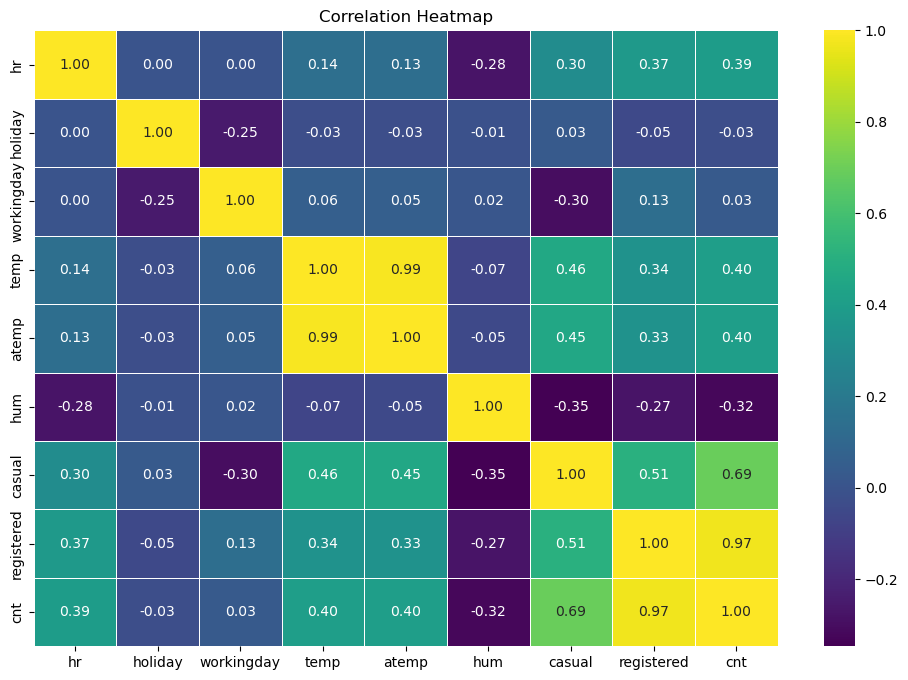

In [20]:
# korelasi heatmap
matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Analisis dari matriks korelasi menunjukkan temuan berikut:

- Variabel temp dan atemp memiliki korelasi yang moderat dengan jumlah penyewa sepeda casual.
- Suhu temp dan atemp memiliki korelasi yang sangat tinggi, mencapai 0.99.
- Kelembaban udara (hum) memiliki korelasi yang lemah dengan jumlah total penyewa sepeda (cnt), sebesar -0.28.
- Jumlah total penyewa sepeda (cnt) memiliki korelasi yang cukup kuat dengan jumlah pengguna sepeda casual dan pengguna registered, masing-masing sebesar 0.69 dan 0.97.

## Visualization & Explanatory Analysis

### Bagaimana tren total penyewaan sepeda berdasarkan musim selama dua tahun terakhir? Apakah terjadi peningkatan atau penurunan dari tahun sebelumnya?

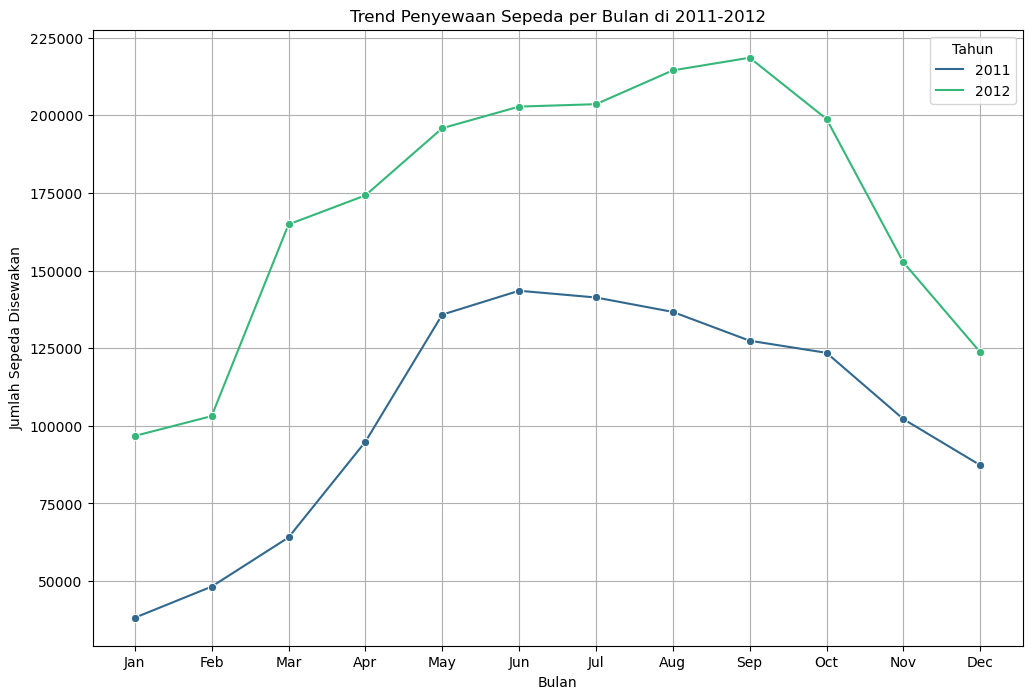

In [21]:
# mengelompokkan data tiap bulan
data_perbulan = df.groupby(by=['mnth','yr']).agg({
    'cnt' : 'sum'
}).reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=data_perbulan, 
             x='mnth', 
             y='cnt', 
             hue='yr', 
             palette="viridis",
             marker="o")
plt.title('Trend Penyewaan Sepeda per Bulan di 2011-2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.grid(True)
plt.legend(title='Tahun')
plt.show()

Dapat disimpulkan bahwa tahun 2012 sangat unggul baik dari bulan januari hingga desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September sedangkan pada tahun 2011 puncak penyewaan sepedada terjadi pada bulan Juni.

### Bagaimana distribusi pengguna sepeda registered dan pengguna sewa casual setiap musimnya?

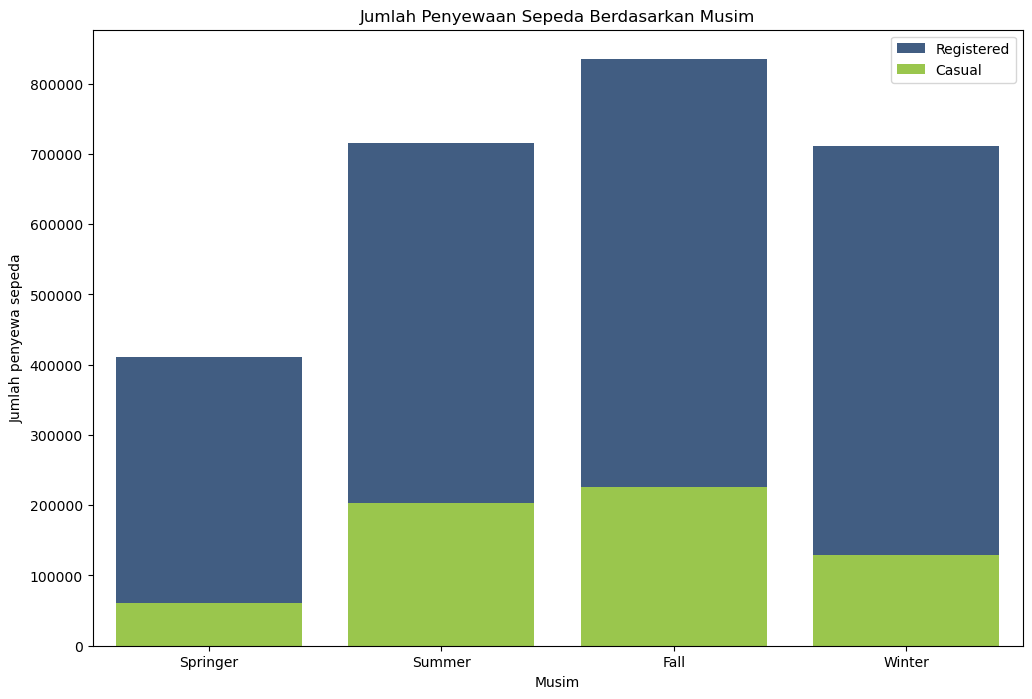

In [22]:
# mengelompokkan data musim
data_musim = df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(12, 8))

sns.barplot(data=data_musim, x='season', y='registered', color=sns.color_palette("viridis")[1], label='Registered')
sns.barplot(data=data_musim, x='season', y='casual', color=sns.color_palette("viridis")[5], label='Casual')

plt.xlabel("Musim")
plt.ylabel("Jumlah penyewa sepeda")
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.legend()
plt.show()

Hasil di atas menunjukkan bahwa musim Gugur adalah waktu yang paling diminati oleh para penyewa sepeda, sementara minat terhadap penyewaan sepeda pada musim Semi cenderung lebih rendah. Hal ini menunjukkan preferensi yang jelas dari pengguna sepeda terhadap musim tertentu, di mana mereka cenderung lebih memilih menikmati aktivitas sepeda pada saat musim Gugur daripada musim Semi.

### Bagaimana pola penggunaan sepeda sehari-hari? Apakah adanya hari libur berdampak besar terhadap tingkat penggunaan sepeda?

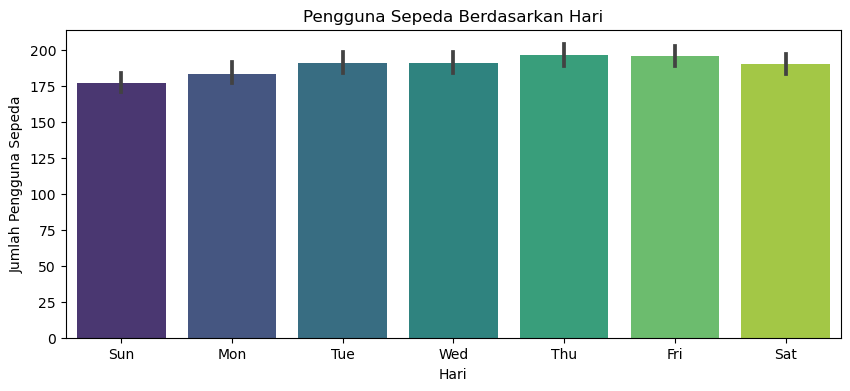

In [23]:
# pengguna sepeda berdasarkan hari

plt.figure(figsize=(10,4))

sns.barplot(
    data = df,
    x = 'weekday',
    y = 'cnt',
    palette= "viridis"
)
plt.title("Pengguna Sepeda Berdasarkan Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()

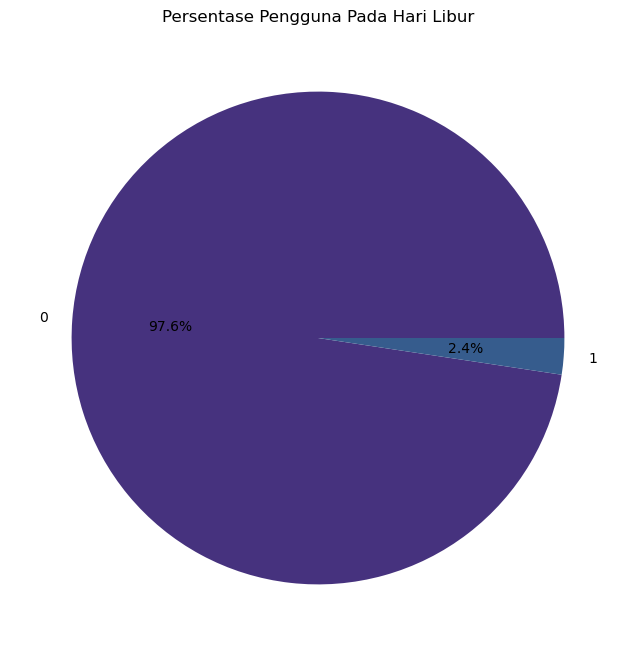

In [24]:
# pengguna sepeda di hari libur
data_harilibur = df.groupby(by='holiday')['cnt'].sum()

plt.figure(figsize=(8,8))
sns.set_palette("viridis")
plt.pie(
    x=data_harilibur,
    labels=df['holiday'].unique(),
    autopct='%1.1f%%'
)
plt.title("Persentase Pengguna Pada Hari Libur")
plt.show()

Hasil analisis menunjukkan bahwa tingkat penyewaan sepeda menunjukkan kestabilan yang konsisten sepanjang hari, dari hari Minggu hingga Sabtu. Menariknya, data mengungkapkan bahwa persentase penyewaan sepeda paling tinggi terjadi pada hari-hari biasa, sementara jumlah penyewaan cenderung sangat rendah pada hari libur.

### Apakah ada pola tertentu dalam penyewaan sepeda berdasarkan jam?

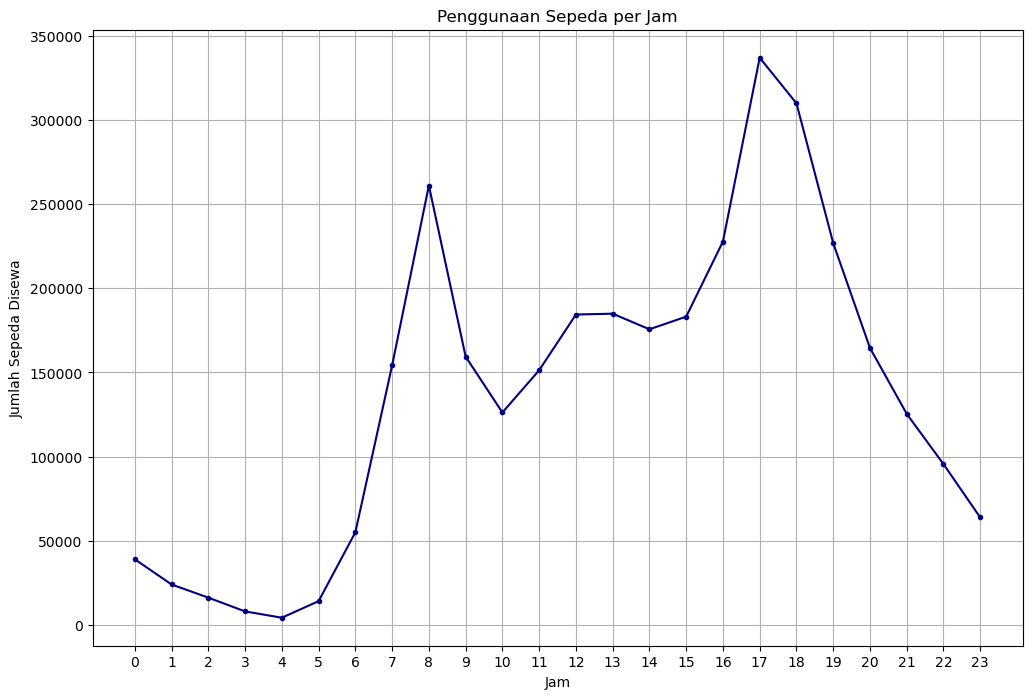

In [25]:
# mengelompokkan data per jam
data_perjam = df.groupby('hr')['cnt'].sum().reset_index()

# Memvisualisasikan penggunaan sepeda per jam
plt.figure(figsize=(12, 8))
plt.plot(data_perjam['hr'], data_perjam['cnt'], marker = ".", label='Count', color='navy')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Penggunaan Sepeda per Jam')
plt.xticks(range(24))
plt.grid(True)
plt.show()

Berdasarkan analisis diatas, para penyewa cenderung menyewa sepeda pada jam 5 Sore (17).Dan jika diurutkan 3 jam teratas penyewaan sepeda adalah sbb :
- Jam 5 Sore (17)
- Jam 6 Sore (18)
- Jam 8 Pagi (8)

Dan jam 4 Pagi (4) menjadi jam / waktu paling jarang bagi penyewa untuk menyewa sepeda.

### Apakah faktor-faktor lain, seperti temperatur dan kelembapan berpengaruh terhadap jumlah pengguna sepeda?

Text(0.5, 1.0, 'Pengaruh Kelembapan terhadap Pengguna Sepeda')

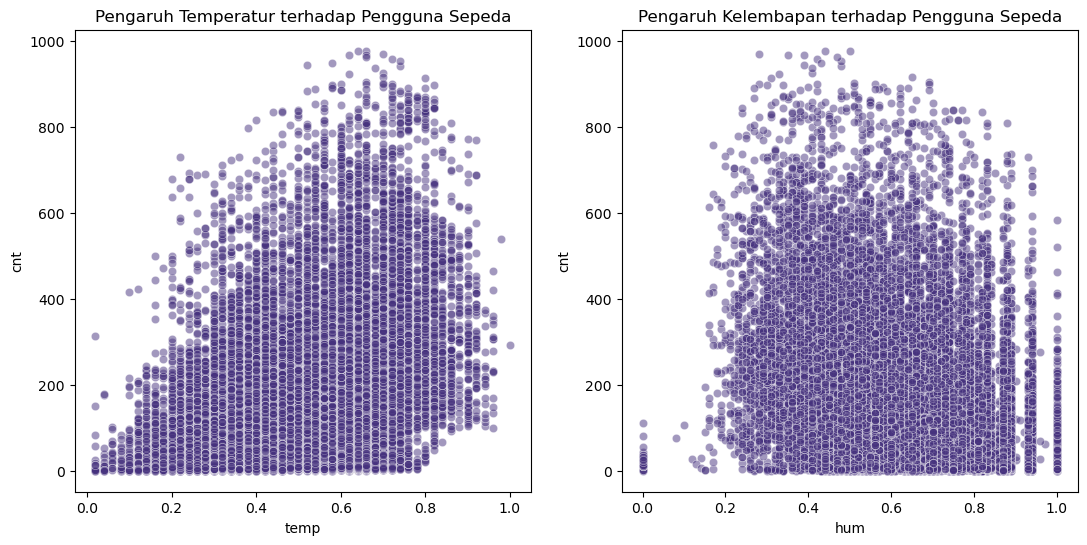

In [26]:
plt.figure(figsize=(20,6))

# Pengaruh Temperatur terhadap Pengguna Sepeda
plt.subplot(1,3,1)
sns.scatterplot(
    x='temp',
    y='cnt',
    data=df,
    alpha=0.5
)
plt.title('Pengaruh Temperatur terhadap Pengguna Sepeda')

# Pengaruh Kelembapan terhadap Pengguna Sepeda
plt.subplot(1,3,2)
sns.scatterplot(
    x='hum',
    y='cnt',
    data=df,
    alpha=0.5
)
plt.title('Pengaruh Kelembapan terhadap Pengguna Sepeda')

Berdasarkan analisis diatas, didapatkan pernyataan sebagai berikut :
- Hubungan antara temp dan cnt menunjukkan korelasi yang positif
- Sedangkan hubungan antara hum dengan cnt menunjukkan korelasi yang negatif 

Sehingga ketika temperatur (temp) meningkat, maka penyewa sepeda juga cenderung meningkat. Dan pengaruh kelembapan (hum) sangat kecil terhadap jumlah penyewa sepeda, walaupun terlihat cenderung menurunkan jumlah penyewa sepeda.

## Conclusion

-  Conclusion Bagaimana tren total penyewaan sepeda berdasarkan musim selama dua tahun terakhir? Apakah terjadi peningkatan atau penurunan dari tahun sebelumnya? Pada visualisasi lineplot ini, kita memperhatikan perbedaan dalam pola penyewaan sepeda antara tahun 2011 dan 2012. Terdapat variasi yang signifikan dalam puncak dan lembah tren bulanan antara kedua tahun tersebut. Pada tahun 2011, puncak tren terjadi pada bulan Juni dengan lembah tren pada bulan Januari, sedangkan pada tahun 2012, puncak tren terjadi pada bulan September dengan lembah tren yang sama pada bulan Januari. Selain itu, total jumlah sepeda yang disewakan pada tahun 2012 jauh lebih tinggi dibandingkan dengan tahun 2011, seperti yang dapat diamati dari kedua visualisasi tersebut.
- Conclusion Bagaimana distribusi pengguna sepeda registered dan pengguna sewa casual setiap musimnya? Dalam visualisasi barplot di atas, hasilnya cukup mengejutkan karena musim semi (Spring) bukanlah yang paling sedikit penggunanya, melainkan musim dingin (Winter) yang berada di peringkat terakhir. Di sisi lain, musim gugur (Fall) mendominasi sebagai musim dengan jumlah penyewaan sepeda tertinggi, mencapai lebih dari 800.000 transaksi. Perhatikan bahwa perbandingan antara pengguna casual dan pengguna terdaftar (registered) cenderung serupa untuk setiap musim, dengan keduanya menyumbang lebih dari 70% dari total penggunaan sepeda pada setiap musim. Namun, perbedaan yang paling mencolok terlihat pada musim semi, di mana perbandingan antara keduanya sangat ekstrem.
- Conclusion Bagaimana pola penggunaan sepeda sehari-hari? Apakah adanya hari libur berdampak besar terhadap tingkat penggunaan sepeda? Meskipun visualisasi barplot menunjukkan pola yang konsisten dari hari Minggu hingga Sabtu, penting untuk diperhatikan perbedaan signifikan terlihat pada pie chart. Pie chart mengungkapkan bahwa sebagian besar penyewaan sepeda terjadi saat bukan hari libur mencapai 97.6%, sementara jumlah penyewaan saat hari libur sangat sedikit, hanya 2.4% dari total penyewaan sepeda.
- Conclusion Apakah ada pola tertentu dalam penyewaan sepeda berdasarkan jam? Pada visualisasi diatas, dapat diamati bahwa sebagian besar penyewa cenderung menyewa sepeda pada pukul 5 sore (17). Dari analisis tersebut, terlihat bahwa tiga jam dengan penyewaan sepeda tertinggi adalah pukul 5 sore (17), pukul 6 sore (18), dan pukul 8 pagi (8). Namun, pada pukul 4 pagi (04), jumlah penyewaan sepeda cenderung sangat rendah. Hal ini mengindikasikan bahwa pengguna sepeda umumnya menyewa sepeda saat akan berangkat atau pulang dari pekerjaan.
- Conclusion Apakah faktor-faktor lain, seperti temperatur dan kelembapan berpengaruh terhadap jumlah pengguna sepeda? Visualisasi scatter plot menunjukkan adanya korelasi positif antara suhu dan jumlah penyewaan sepeda (cnt), yang mengindikasikan bahwa ketika suhu naik, jumlah penyewaan sepeda juga cenderung meningkat. Sebaliknya, korelasi antara tingkat kelembapan (hum) dan jumlah penyewaan sepeda menunjukkan hubungan negatif yang lemah, menandakan bahwa kelembapan memiliki pengaruh yang relatif kecil terhadap jumlah penyewaan sepeda, meskipun cenderung menguranginya.